In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("tinder_google_play_reviews.csv")
print(data.head())


                               reviewId          userName  \
0  6fb3d981-4928-4f87-97d5-cfa13bcc46be  Ekunu best / እኩኑ   
1  32f3d1dd-8b0b-40c4-a4de-a173953e729e   Nishant Agrawal   
2  5c32c959-7e16-4e8d-8c32-6ee1a0aa0769     Hemant Gautam   
3  8bd2ac9e-5a0d-48d8-b8ba-80fcf8331d7c       Asghar Khan   
4  f936151e-a07d-41c7-a598-f7c0390aa80d      ben benedict   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/AFdZu...   
1  https://play-lh.googleusercontent.com/a-/AFdZu...   
2  https://play-lh.googleusercontent.com/a-/AFdZu...   
3  https://play-lh.googleusercontent.com/a-/AFdZu...   
4  https://play-lh.googleusercontent.com/a-/AFdZu...   

                                             content  score  thumbsUpCount  \
0                                           Nice app      5              0   
1  Its algorithm is racist....show those people w...      1              0   
2  It does not deserve a single star but as I don...      1   

In [22]:
data= data[["content"]]
data.isnull().sum()
data=data.dropna()
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english)'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nakul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


OSError: No such file or directory: 'C:\\Users\\Nakul\\AppData\\Roaming\\nltk_data\\corpora\\stopwords\\english)'

In [ ]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

                                             content  Positive  Negative  \
0                                           Nice app     0.737     0.000   
1  Its algorithm is racist....show those people w...     0.275     0.000   
2  It does not deserve a single star but as I don...     0.159     0.116   
3        Nice and great application.....,***********     0.775     0.000   
4  Redownloaded tinder and tried logging in and i...     0.000     0.168   

   Neutral  
0    0.263  
1    0.725  
2    0.725  
3    0.225  
4    0.832  


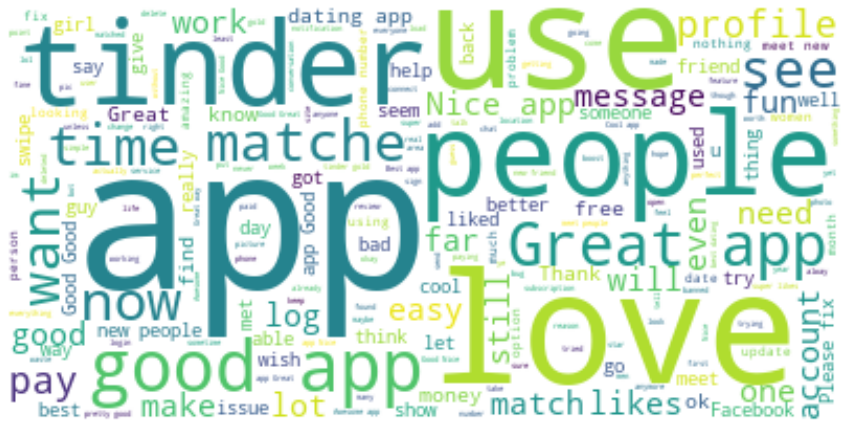

In [ ]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

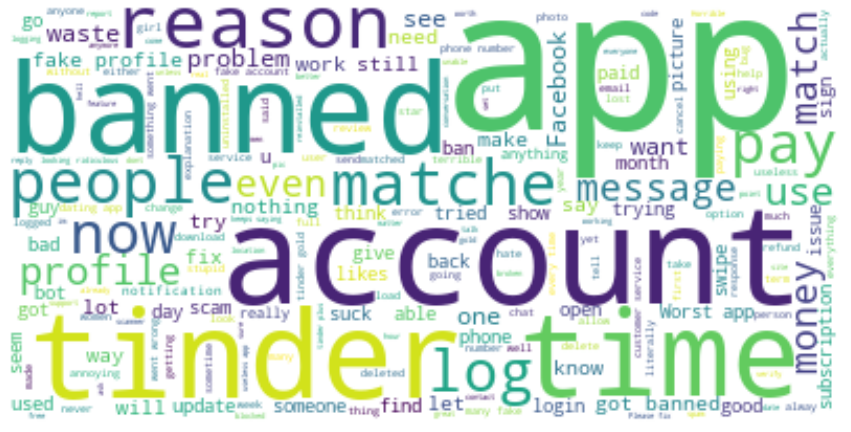

In [ ]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [23]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  152259.79400002718
Negative:  54393.75299999794
Neutral:  333762.35699995444
